In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
x_data = train_data['LotArea'].values
y_data = train_data['SalePrice'].values

x_train, x_test,y_train  , y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

print(len(x_train),len(y_train),len(x_test),len(y_test))
print(np.sum(np.isnan(x_train)),np.sum(np.isnan(y_train)),np.sum(np.isnan(x_test)),np.sum(np.isnan(y_test)))

#x_train  = x_train.reshape(len(x_train),1)
#y_train  = y_train.reshape(len(y_train),1)
#x_test  = x_test.reshape(len(x_test),1)
#y_test  = y_test.reshape(len(y_test),1)

1168 1168 292 292
0 0 0 0


In [41]:
np.savetxt('../data/x_train.csv',x_train)
np.savetxt('../data/x_test.csv',x_test)
np.savetxt('../data/y_train.csv',y_train)
np.savetxt('../data/y_test.csv',y_test)

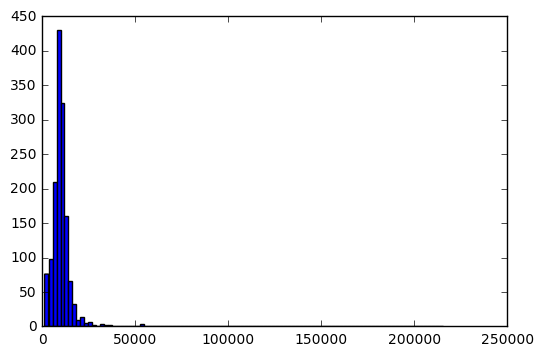

In [6]:
%matplotlib inline  
plt.hist(x_data, bins=100)
plt.show()

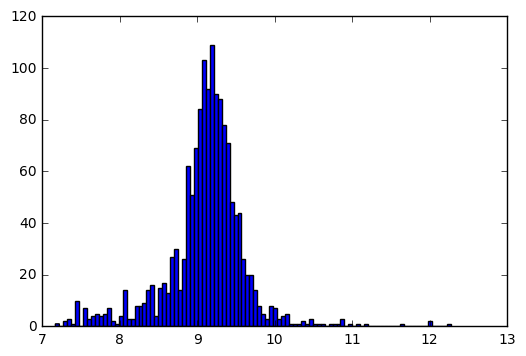

In [7]:
plt.hist(np.log(x_data), bins=100)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print(len(x_train),len(y_train))
lr.fit(np.log(x_train), y_train)
y_pred = lr.predict(np.log(x_test))

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print('rmse = ',rmse)

1168 1168
rmse =  5857177515.6


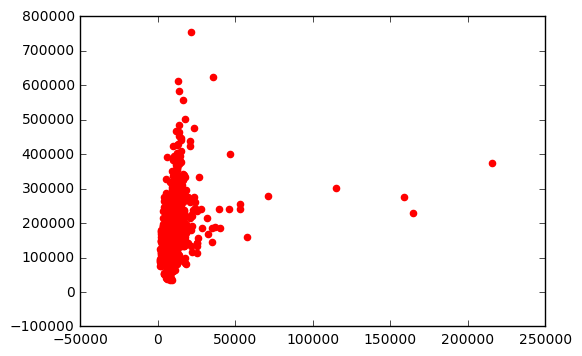

In [26]:
plt.scatter(x_train, y_train,color='red')
#plt.plot(x_train,lr.predict(x_train), color='blue')

In [29]:
y_train_1 = np.log(y_train)

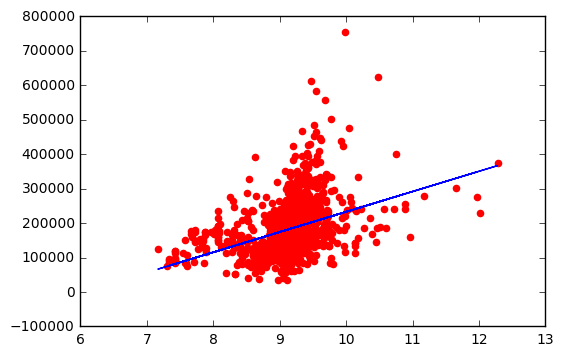

In [37]:
plt.scatter(np.log(x_train), y_train,color='red')
plt.plot(np.log(x_train),lr.predict(np.log(x_train)), color='blue')

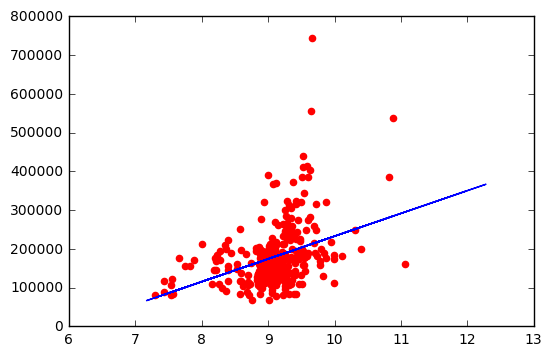

In [38]:
plt.scatter(np.log(x_test), y_test,color='red')
plt.plot(np.log(x_train),lr.predict(np.log(x_train)), color='blue')